In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Image resized 

In [2]:
class Resizing:
    def __init__(self, target_size=(266, 266)):
        self.target_size = target_size

    def resize_images(self, input_dir, output_dir): #For images inside a folder
        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Loop through files in input directory
        for filename in os.listdir(input_dir):
            lowercase_filename = filename.lower()
            if lowercase_filename.endswith('.jpg') or lowercase_filename.endswith('.png'):
                # Read image
                image_path = os.path.join(input_dir, filename)
                image = cv2.imread(image_path)

                # Resize image
                resized_image = cv2.resize(image, self.target_size)

                # Save resized image to output directory
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, resized_image)

                print(f"Resized and saved {filename} to {output_path}")

        print("Done resizing and saving images.")

    def resize_image(self, image_path, save_path):  # For a single image only
        image = cv2.imread(image_path)

        resized_image = cv2.resize(image, self.target_size)

        cv2.imwrite(save_path, resized_image)

        print("Done resizing and saving image.")
        
        return resized_image


## Test Resize

In [3]:
resizer = Resizing()
input_dir = 'pics/raw/mango-tree/IMG_5441.JPG'
output_dir = 'test_image_resize.jpg'
preprocess_image = resizer.resize_image(input_dir,output_dir)

Done resizing and saving image.


In [ ]:
input_directory = 'pics/raw/mango-tree'
output_dirrectory = 'pics/new_resized/mango-tree'

resizer = Resizing()
resizer.resize_images(input_directory,output_dirrectory)

In [ ]:
input_directory = 'pics/raw/mulawin'
output_dirrectory = 'pics/new_resized/mulawin'

resizer = Resizing()
resizer.resize_images(input_directory,output_dirrectory)

# Image Preprocessing Techniques

In [72]:
class ImagePreprocessor:
    def __init__(self):
        pass

    def apply_hog_descriptor(self, image):
        hog = cv2.HOGDescriptor()
        hog_features = hog.compute(image)
        return hog_features

    def apply_edge_detection(self, image):
        edges = cv2.Canny(image, 100, 200)
        return edges

    def apply_segmentation(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret, segmented = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        return segmented

    def convert_to_grayscale(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray

    def extract_features(self, image):
        # Example: Apply HOG descriptor
        return self.apply_hog_descriptor(image)

    def reduce_noise(self, image):
        # Example: Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
        return blurred_image

    def preprocess_images_in_directory(self, input_dir, output_dir):
        os.makedirs(output_dir, exist_ok=True)

        for filename in os.listdir(input_dir):
            lowercase_filename = filename.lower()
            if lowercase_filename.endswith('.jpg') or lowercase_filename.endswith('.png'):
                image_path = os.path.join(input_dir, filename)
                output_path = os.path.join(output_dir, filename)

                self.preprocess_image(image_path, output_path)
                print(f"Preprocessed and saved {filename} to {output_path}")

        print("Done preprocessing and saving images.")

    def preprocess_image(self, image_path, save_path):
        image = cv2.imread(image_path)

        processed_image = self.apply_edge_detection(image)
        processed_image = self.apply_segmentation(processed_image)
        processed_image = self.convert_to_grayscale(processed_image)
        features = self.extract_features(processed_image)
        processed_image = self.reduce_noise(processed_image)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)

        cv2.imwrite(save_path, processed_image)

## Testing

In [73]:
processor = ImagePreprocessor()
input_dir = 'test_image_resize.jpg'
output_dir = 'test_1.jpg'

input_img = cv2.imread(input_dir)
grayscale = processor.convert_to_grayscale(input_img)

cv2.imwrite(output_dir, grayscale)


True

# Models

In [74]:
class Classifier:
    def __init__(self, classifier_type, **kwargs):
        if classifier_type == 'SVM':
            self.classifier = SVC(**kwargs)
        elif classifier_type == 'RandomForest':
            self.classifier = RandomForestClassifier(**kwargs)
        elif classifier_type == 'NaiveBayes':
            self.classifier = GaussianNB()
        elif classifier_type == 'DecisionTree':
            self.classifier = DecisionTreeClassifier(**kwargs)
        elif classifier_type == 'KNN':
            self.classifier = KNeighborsClassifier(**kwargs)
        elif classifier_type == 'LogisticRegression':
            self.classifier = LogisticRegression(**kwargs)
        else:
            raise ValueError("Invalid classifier type. Supported types are: SVM, RandomForest, NaiveBayes, DecisionTree, KNN, LogisticRegression")
    
    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)

# Evaluation of Models

In [75]:
class ModelEvaluation:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
    
    def precision(self):
        return precision_score(self.y_true, self.y_pred, average='weighted')
    
    def recall(self):
        return recall_score(self.y_true, self.y_pred, average='weighted')
    
    def f1_score(self):
        return f1_score(self.y_true, self.y_pred, average='weighted')
    
    def accuracy(self):
        return accuracy_score(self.y_true, self.y_pred)

# Data Visualization

In [94]:
def load_images_from_directory(directory):
    images = []
    labels = []
    class_names = []
    for root,dirs,files, in os.walk(directory):
        for class_name in dirs:
            class_dir = os.path.join(root, class_name)
            for filename in os.listdir(class_dir):
                img_path = os.path.join(class_dir, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    images.append(image)
                    labels.append(class_name)
                    class_names.append(class_name)
    return images, labels, class_names

def extract_features(image):
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	hog = cv2.HOGDescriptor()
	features = hog.compute(gray)
	return features.flatten()

class DataVisualization:
    def __init__(self):
        pass
    
    def visualize_bargraph(self, labels, class_names):
        class_counts = {class_name: labels.count(class_name) for class_name in set(class_names)}
        plt.bar(class_counts.keys(), class_counts.values())
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Class Distribution')
        plt.show()
        total_samples = sum(class_counts.values())
        for class_name, count in class_counts.items():
            percentage = (count / total_samples) * 100
            print(f'{class_name}: {count} samples ({percentage:.2f}%)')
            
    def visualize_heatmap(self, images):
        # Convert images to numpy array
        images_array = np.array(images) / 255.0
        
        # Calculate average pixel intensity across all images
        average_intensity = np.mean(images_array, axis=0)
        
        # Visualize heatmap
        plt.figure(figsize=(8, 6))
        plt.imshow(average_intensity, cmap='hot', interpolation='nearest')
        plt.colorbar(label='Average Pixel Intensity')
        plt.title('Heatmap of Average Pixel Intensity')
        plt.show()

    def visualize_linegraph(self,labels, class_names):
        class_counts = {class_name: labels.count(class_name) for class_name in set(class_names)}
        sorted_counts = sorted(class_counts.items(), key=lambda x: class_names.index(x[0]))  # Sort by original order of class_names
    
        # Extract class names and corresponding counts
        class_names = [item[0] for item in sorted_counts]
        counts = [item[1] for item in sorted_counts]
    
        # Visualize line graph
        plt.figure(figsize=(10, 6))
        plt.plot(class_names, counts, marker='o', linestyle='-')
        plt.xlabel('Class')
        plt.ylabel('Number of Images')
        plt.title('Class Distribution Over Time')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.grid(True)
        plt.show()

    def visualize_scatterplot(self, directory):
        # Load images from directory
        images, _, _ = load_images_from_directory(directory)
    
        # Extract features (mean pixel intensity)
        features = [np.mean(image) for image in images]
    
        # Define y variable for the scatter plot (image index)
        y_data = range(len(features))
    
        # Visualize scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(features, y_data)
        plt.xlabel('Mean Pixel Intensity')
        plt.ylabel('Image Index')
        plt.title('Scatter Plot of Mean Pixel Intensity')
        plt.show()


In [91]:
directory = 'pics/new_resized'

In [92]:
images, labels, class_names = load_images_from_directory(directory)

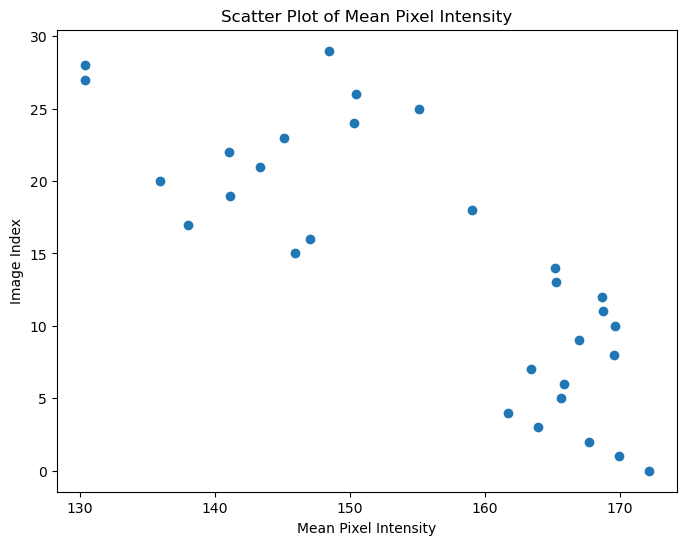

In [93]:
vis = DataVisualization()
vis.visualize_scatterplot(directory)

In [95]:
features = np.array([extract_features(img) for img in images])

In [96]:
# 30% test size mas maganda kapag maunti palang data mo
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state=42)

In [97]:
classifier = Classifier(classifier_type='SVM', kernel='linear')
classifier.train(X_train, y_train)
y_pred_svm = classifier.predict(X_test)

In [101]:
eval = ModelEvaluation(y_test,y_pred_svm)
precision_svm = eval.precision()
recall_svm = eval.recall()
f1_score_svm = eval.f1_score()
accuracy_svm = eval.accuracy()

In [103]:
print("Precision Score SVM:", precision_svm * 100)
print("Recall Score SVM:", recall_svm * 100)
print("F1 Score SVM:", f1_score_svm * 100)
print("Accuracy Score SVM:", accuracy_svm * 100)

Precision Score SVM: 100.0
Recall Score SVM: 100.0
F1 Score SVM: 100.0
Accuracy Score SVM: 100.0


In [104]:
classifier_rfc = Classifier(classifier_type='RandomForest', n_estimators=100)
classifier_rfc.train(X_train, y_train)
y_pred_rfc = classifier_rfc.predict(X_test)

In [105]:
eval_rfc = ModelEvaluation(y_test,y_pred_rfc)
precision_rfc = eval_rfc.precision()
recall_rfc = eval_rfc.recall()
f1_score_rfc = eval_rfc.f1_score()
accuracy_rfc = eval_rfc.accuracy()

In [106]:
print("Precision Score RFC:", precision_rfc * 100)
print("Recall Score RFC:", recall_rfc * 100)
print("F1 Score RFC:", f1_score_rfc * 100)
print("Accuracy Score RFC:", accuracy_rfc * 100)

Precision Score RFC: 91.66666666666666
Recall Score RFC: 88.88888888888889
F1 Score RFC: 89.17748917748918
Accuracy Score RFC: 88.88888888888889
